In [33]:
import numpy as np
import matplotlib.pyplot as plt

error = 1
c= 0
while True:
    error = error/2
    c+=1
    if 1+error == 1:
        break
        
eps = error*2

print(np.log2(eps))

-52.0


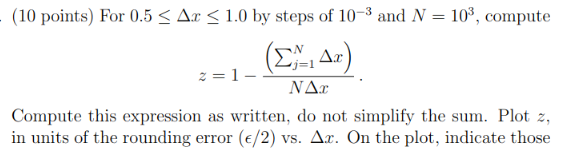
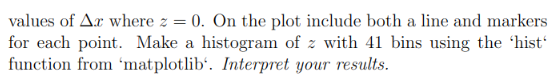

In [30]:
del_x = np.arange(0.5,1,0.001) #not 0.001 to get more data!

N=1000
all_z = []
for x in del_x:
    tot = 0
    for i in range(1,N+1):
        tot+=x
    z = 1-tot/(N*x)
    all_z.append(z)


7.948367231584678


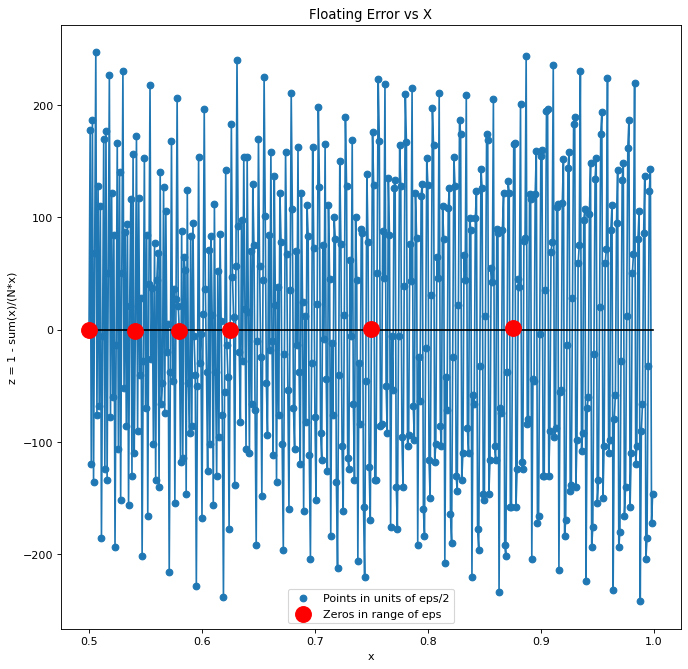

In [31]:
r_z = 2*np.array(all_z)/eps

print(np.log2(max(r_z)))

z_array = np.array(all_z) #make z an array

#get filter for actual zeros
mask = np.abs(r_z) <= 2   #so a full epsilon 2*eps/2 = eps and eps is floating point precision

#apply filter
z_zeros = z_array[mask]
x_zeros = del_x[mask]

plt.figure(figsize=(10, 10), dpi=80)



plt.plot(del_x, r_z, zorder=1) #plots the errors connected by lines
plt.scatter(del_x, r_z,zorder=2, label='Points in units of eps/2') #plots the points

plt.plot(del_x, np.zeros_like(r_z), c='black') #plots a line at z=0
plt.scatter(x_zeros, z_zeros/eps, zorder=3, c='red', s=200, label='Zeros in range of eps')  #plots the zeros

#print(z_zeros)


plt.title('Floating Error vs X')
plt.ylabel('z = 1 - sum(x)/(N*x)')
plt.xlabel('x')

plt.legend()


Yields a symmetric distrobution about 109.5 (if you up the number of points) in units of epsilon/2. Epsilon is 2^-53. Which is again the precision/resolution of a computer.

Thus there must be no substantial preference betweeen floating point error going above or below 0,
on average it will end up 109.5 units of epsilon/2 in either direction

It will not stray past a few hundred units of epsilon/2 2 from true 0. So the error is confined between those two values.



Average of positive values: 111.88259109311741
Average of negative values: 106.72509960159363

2^6.805841760516846 away from 0
2^6.737755698761383 away from 0


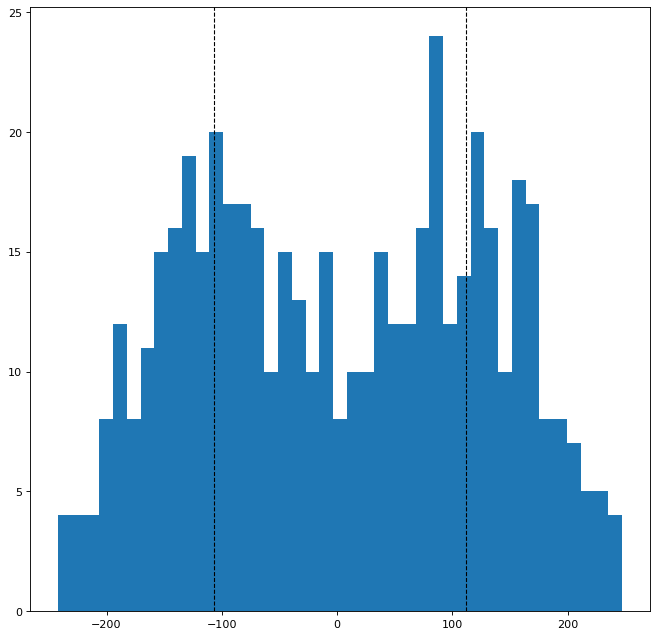

In [32]:
pos_z = np.mean(r_z[r_z>0])
neg_z = np.mean(r_z[r_z<0])

print(f'Average of positive values: {pos_z}')
print(f'Average of negative values: {abs(neg_z)}')
print('')
print(f'2^{np.log2(pos_z)} away from 0')
print(f'2^{np.log2(abs(neg_z))} away from 0')

plt.figure(figsize=(10,10), dpi=80)
plt.hist(r_z, bins=41)

plt.axvline(pos_z, color='k', linestyle='dashed', linewidth=1)
plt.axvline(neg_z, color='k', linestyle='dashed', linewidth=1)

plt.show()

